In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score,classification_report
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data/Iris.csv")

In [4]:
for i in data.columns:
  print(i,data[i].nunique())

Id 150
SepalLengthCm 35
SepalWidthCm 23
PetalLengthCm 43
PetalWidthCm 22
Species 3


In [5]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data=data.drop(['Id'],axis=1)

In [7]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
le=preprocessing.LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [9]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
data.shape

(150, 5)

In [11]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [12]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
numcols=data.dtypes[(data.dtypes=='float64')].index

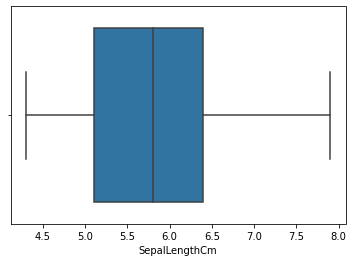

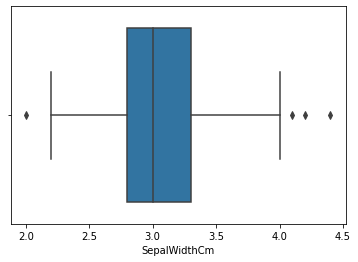

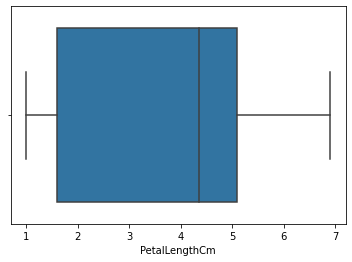

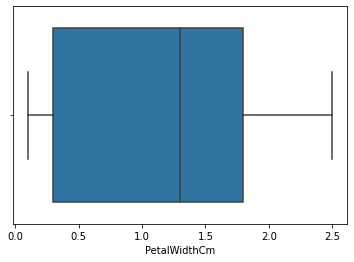

In [14]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [15]:
for x in numcols:
    desc=data[x].describe()
    IQR=desc['75%']-desc['25%']
    ul=desc['75%']+1.5*IQR
    ll=desc['25%']-1.5*IQR
    data[x][data[x]>ul]=ul
    data[x][data[x]<ll]=ll

In [16]:
X=data.drop(['Species'],axis=1)
y=data['Species']

In [17]:
X.shape,y.shape

((150, 4), (150,))

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [20]:
naive_classifier = GaussianNB()

In [21]:
naive_classifier.fit(X_train,y_train)

GaussianNB()

In [22]:
y_pred=naive_classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [23]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Species, dtype: int64

In [24]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [25]:
accuracy_score(y_test,y_pred)*100

100.0